In [1]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
import cv2

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
path = '/kaggle/input/plant-disease-classification-merged-dataset'

In [3]:
lst = os.listdir(path)
lst.sort()
lst

['Apple__black_rot',
 'Apple__healthy',
 'Apple__rust',
 'Apple__scab',
 'Cassava__bacterial_blight',
 'Cassava__brown_streak_disease',
 'Cassava__green_mottle',
 'Cassava__healthy',
 'Cassava__mosaic_disease',
 'Cherry__healthy',
 'Cherry__powdery_mildew',
 'Chili__healthy',
 'Chili__leaf curl',
 'Chili__leaf spot',
 'Chili__whitefly',
 'Chili__yellowish',
 'Coffee__cercospora_leaf_spot',
 'Coffee__healthy',
 'Coffee__red_spider_mite',
 'Coffee__rust',
 'Corn__common_rust',
 'Corn__gray_leaf_spot',
 'Corn__healthy',
 'Corn__northern_leaf_blight',
 'Cucumber__diseased',
 'Cucumber__healthy',
 'Gauva__diseased',
 'Gauva__healthy',
 'Grape__black_measles',
 'Grape__black_rot',
 'Grape__healthy',
 'Grape__leaf_blight_(isariopsis_leaf_spot)',
 'Jamun__diseased',
 'Jamun__healthy',
 'Lemon__diseased',
 'Lemon__healthy',
 'Mango__diseased',
 'Mango__healthy',
 'Peach__bacterial_spot',
 'Peach__healthy',
 'Pepper_bell__bacterial_spot',
 'Pepper_bell__healthy',
 'Pomegranate__diseased',
 'Pome

### Prepare the training data

#### Used Class

In [4]:
usedClass = [
 'Apple__black_rot',
 'Apple__healthy',
 'Apple__rust',
 'Apple__scab',
 'Chili__healthy',
 'Chili__leaf curl',
 'Chili__leaf spot',
 'Chili__whitefly',
 'Chili__yellowish',
 'Coffee__cercospora_leaf_spot',
 'Coffee__healthy',
 'Coffee__red_spider_mite',
 'Coffee__rust',
 'Corn__common_rust',
 'Corn__gray_leaf_spot',
 'Corn__healthy',
 'Corn__northern_leaf_blight',
 'Grape__black_measles',
 'Grape__black_rot',
 'Grape__healthy',
 'Grape__leaf_blight_(isariopsis_leaf_spot)',
 'Pepper_bell__bacterial_spot',
 'Pepper_bell__healthy',
 'Potato__early_blight',
 'Potato__healthy',
 'Potato__late_blight',
 'Rice__brown_spot',
 'Rice__healthy',
 'Rice__hispa',
 'Rice__leaf_blast',
 'Rice__neck_blast',
 'Soybean__bacterial_blight',
 'Soybean__caterpillar',
 'Soybean__diabrotica_speciosa',
 'Soybean__downy_mildew',
 'Soybean__healthy',
 'Soybean__mosaic_virus',
 'Soybean__powdery_mildew',
 'Soybean__rust',
 'Soybean__southern_blight',
 'Tea__algal_leaf',
 'Tea__anthracnose',
 'Tea__bird_eye_spot',
 'Tea__brown_blight',
 'Tea__healthy',
 'Tea__red_leaf_spot',
 'Tomato__bacterial_spot',
 'Tomato__early_blight',
 'Tomato__healthy',
 'Tomato__late_blight',
 'Tomato__leaf_mold',
 'Tomato__mosaic_virus',
 'Tomato__septoria_leaf_spot',
 'Tomato__spider_mites_(two_spotted_spider_mite)',
 'Tomato__target_spot',
 'Tomato__yellow_leaf_curl_virus'
]

### Labeling

In [5]:
image_dir = Path(path)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.PNG')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [6]:
image_df

,Filepath,Label
0,/kaggle/input/plant-disease-classification-mer...,Tomato__septoria_leaf_spot
1,/kaggle/input/plant-disease-classification-mer...,Tomato__septoria_leaf_spot
2,/kaggle/input/plant-disease-classification-mer...,Tomato__septoria_leaf_spot
3,/kaggle/input/plant-disease-classification-mer...,Tomato__septoria_leaf_spot
4,/kaggle/input/plant-disease-classification-mer...,Tomato__septoria_leaf_spot
...,...,...
79079,/kaggle/input/plant-disease-classification-mer...,Tomato__mosaic_virus
79080,/kaggle/input/plant-disease-classification-mer...,Tomato__mosaic_virus
79081,/kaggle/input/plant-disease-classification-mer...,Tomato__mosaic_virus
79082,/kaggle/input/plant-disease-classification-mer...,Tomato__mosaic_virus


In [7]:
labels_to_filter = usedClass
image_df = image_df[image_df['Label'].isin(labels_to_filter)]

In [8]:
len(image_df['Label'].unique())

56

In [9]:
image_df = image_df.reset_index()

### Subset data

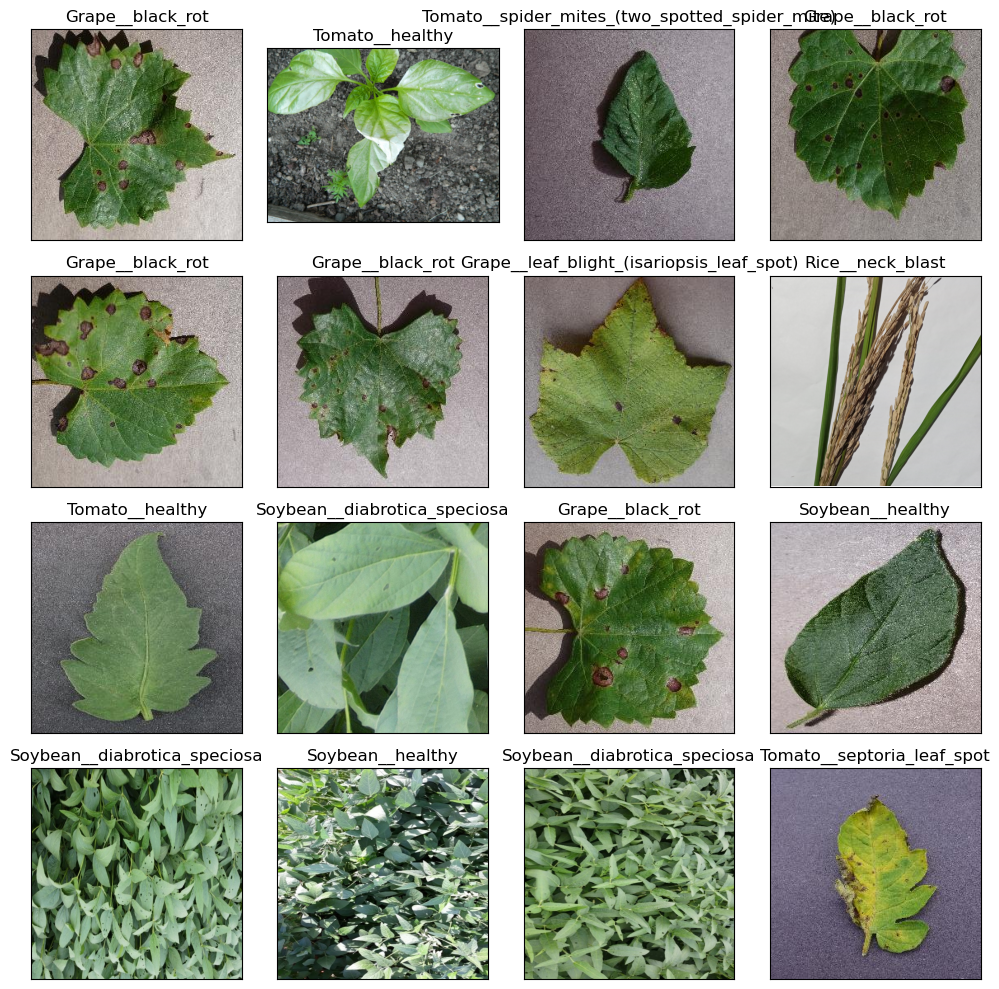

In [10]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

### Data Processing

In [11]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [12]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

In [13]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 40532 validated image filenames belonging to 56 classes.
Found 10133 validated image filenames belonging to 56 classes.
Found 12667 validated image filenames belonging to 56 classes.


In [14]:
image_batch, label_batch = next(val_images)
image_batch.shape, label_batch.shape

((64, 224, 224, 3), (64, 56))

### Data Training

#### Base Model

In [15]:
# Load the pretained model
base_model = tf.keras.applications.MobileNetV3Large(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

12683000/12683000 [==============================] - 0s 0us/step


In [16]:
# Create checkpoint callback
checkpoint_path = "disease_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [17]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) # if val loss decreases for 3 epochs in a row, stop training

In [24]:
model = tf.keras.Sequential([
  base_model,
#   tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=56, activation='softmax')
])

In [25]:
model.compile(
    optimizer=Adam(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 7, 7, 960)        2996352   
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 960)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 256)               246016    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)              

In [27]:
print('Number of trainable weights = {}'.format(len(model.trainable_weights)))

Number of trainable weights = 6


In [ ]:
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=100,
    callbacks=[
        early_stopping,
        checkpoint_callback,
    ]
)

Epoch 1/100
634/634 [==============================] - 593s 928ms/step - loss: 2.9997 - accuracy: 0.2417 - val_loss: 2.5993 - val_accuracy: 0.2956
Epoch 2/100
634/634 [==============================] - 401s 633ms/step - loss: 2.3947 - accuracy: 0.3370 - val_loss: 2.1203 - val_accuracy: 0.4005
Epoch 3/100
634/634 [==============================] - 358s 565ms/step - loss: 2.1161 - accuracy: 0.3934 - val_loss: 1.9733 - val_accuracy: 0.4152
Epoch 4/100
634/634 [==============================] - 348s 548ms/step - loss: 1.9877 - accuracy: 0.4185 - val_loss: 1.7945 - val_accuracy: 0.4732
Epoch 5/100
 39/634 [>.............................] - ETA: 4:16 - loss: 1.8562 - accuracy: 0.4547

### Evaluation

In [ ]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

In [ ]:
plot_loss_curves(history)

### Fine tune the base model

In [ ]:
print("Number of layers in the base model: ", len(base_model.layers))

In [ ]:
base_model.trainable = True
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
print('Number of trainable weights = {}'.format(len(model1.trainable_weights)))

In [ ]:
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=50,
    callbacks=[
        early_stopping,
        checkpoint_callback,
    ]
)

In [ ]:
plot_loss_curves(history)